# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## ETC 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_iota_train_data = pd.read_csv('vader_textblob_iota_train_data').drop('Unnamed: 0',axis=1)
flair_iota_train_data = pd.read_csv('flair_iota_train_data.csv').drop('Unnamed: 0',axis=1)
iota_train_data = pd.read_csv('iota_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_iota_test_data = pd.read_csv('vader_textblob_iota_test_data').drop('Unnamed: 0',axis=1)
flair_iota_test_data = pd.read_csv('flair_iota_test_data.csv').drop('Unnamed: 0',axis=1)
iota_test_data = pd.read_csv('iota_test_data').drop('Unnamed: 0',axis=1)

In [5]:
gfmodel = Greed_Fear_Model(iota_train_data,iota_test_data)

In [7]:
coin =  gfmodel.coin_data_load('iota')

  0%|          | 0/1801 [00:00<?, ?it/s]

In [8]:
gfmodel.convert_train_data(vader_textblob_iota_train_data,flair_iota_train_data)
gfmodel.convert_test_data(vader_textblob_iota_test_data,flair_iota_test_data)

(913, 11)
(913, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/913 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/4902 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,274,0.6289,0.314450,0.400000,0.200000,-0.429456,-0.214728,1273,636.500000,...,0.6151,26478803.0,1.709694e+09,2022-04-29,0.6151,0.6171,0.5663,0.5732,33286020.0,1.593169e+09
1,2022-04-29,21416,6.7952,0.039972,6.676111,0.039271,-84.834709,-0.499028,470942,2770.247059,...,0.5732,33286020.0,1.593169e+09,2022-04-30,0.5731,0.5856,0.5158,0.5305,42906757.0,1.474464e+09
2,2022-04-30,21635,14.8623,0.082568,17.056602,0.094759,-57.433764,-0.319076,230583,1281.016667,...,0.5305,42906757.0,1.474464e+09,2022-05-01,0.5307,0.5494,0.5204,0.5463,36862247.0,1.518444e+09
3,2022-05-01,17684,17.9352,0.123691,19.865298,0.137002,-48.168698,-0.332198,208500,1437.931034,...,0.5463,36862247.0,1.518444e+09,2022-05-02,0.5463,0.5515,0.5125,0.5332,43132832.0,1.482163e+09
4,2022-05-02,13143,18.5565,0.168695,12.707131,0.115519,-15.208704,-0.138261,159173,1447.027273,...,0.5332,43132832.0,1.482163e+09,2022-05-03,0.5332,0.5468,0.4902,0.5018,58531118.0,1.394754e+09
5,2022-05-03,16609,17.0880,0.126578,11.621339,0.086084,-48.339730,-0.358072,133954,992.251852,...,0.5018,58531118.0,1.394754e+09,2022-05-04,0.5018,0.5568,0.5000,0.5538,49521445.0,1.539320e+09
6,2022-05-04,21360,29.4273,0.172089,15.505673,0.090676,-33.864898,-0.198040,300277,1756.005848,...,0.5538,49521445.0,1.539320e+09,2022-05-05,0.5538,0.5605,0.4884,0.4989,49050583.0,1.386688e+09
7,2022-05-05,61239,86.2367,0.183093,42.188052,0.089571,-224.308971,-0.476240,467742,993.082803,...,0.4989,49050583.0,1.386688e+09,2022-05-06,0.4989,0.5045,0.4789,0.4941,32315310.0,1.373352e+09
8,2022-05-06,50629,57.4201,0.146107,43.126488,0.109737,-145.005472,-0.368971,482572,1227.918575,...,0.4941,32315310.0,1.373352e+09,2022-05-07,0.4941,0.4979,0.4690,0.4773,21689049.0,1.326703e+09
9,2022-05-07,59140,81.1576,0.170858,60.522095,0.127415,-193.025308,-0.406369,400563,843.290526,...,0.4773,21689049.0,1.326703e+09,2022-05-08,0.4774,0.4812,0.4609,0.4654,30098325.0,1.293484e+09


In [9]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-1.161092,-0.870958,2.322727,-1.114552,2.707360,1.011045,0.397028,-1.705486,-1.061259,-0.796827,...,1.525598,-0.915892,1.525675,1.525243,1.484747,1.396773,1.333857,-0.718977,1.333706,2022-04-28
1,-0.491424,-0.713439,-1.070665,-0.832341,-1.364279,0.052491,-1.527477,0.653480,1.995393,-0.203904,...,1.110833,-0.673893,1.110674,1.109728,1.142674,0.896156,0.883279,-0.369415,0.883031,2022-04-29
2,-0.484487,-0.507362,-0.544041,-0.365574,0.041354,0.363672,-0.309336,-0.553750,-0.137971,3.227944,...,0.688150,-0.331873,0.687911,0.690255,0.749560,0.941756,1.050003,-0.589038,1.050006,2022-04-30
3,-0.609634,-0.428864,-0.035639,-0.239278,1.111473,0.468891,-0.398159,-0.664665,0.086813,-0.546985,...,0.844553,-0.546757,0.844544,0.844590,0.772365,0.863442,0.911770,-0.361201,0.912262,2022-05-01
4,-0.753469,-0.412993,0.520754,-0.561151,0.567266,0.843203,0.914656,-0.912415,0.099844,-0.678861,...,0.714877,-0.323836,0.715331,0.714988,0.721325,0.642377,0.580432,0.198285,0.580403,2022-05-02
5,-0.643685,-0.450506,0.000050,-0.609975,-0.178402,0.466949,-0.573308,-1.039080,-0.551635,-0.685558,...,0.404051,0.223577,0.404025,0.404342,0.829920,0.739527,1.129145,-0.129075,1.129265,2022-05-03
6,-0.493198,-0.135296,0.562714,-0.435313,-0.062064,0.631333,0.509992,-0.203704,0.542464,-0.553682,...,0.918794,-0.096719,0.918895,0.918789,0.870100,0.624533,0.549830,-0.146183,0.549781,2022-05-04
7,0.769959,1.315916,0.698749,0.764483,-0.090062,-1.531458,-1.373220,0.637407,-0.550445,-0.311567,...,0.375344,-0.113458,0.375300,0.375651,0.261969,0.530358,0.499180,-0.754247,0.499151,2022-05-05
8,0.433890,0.579788,0.241493,0.806680,0.420775,-0.630842,-0.647084,0.711893,-0.214036,0.375111,...,0.327829,-0.708402,0.327805,0.328164,0.190297,0.432217,0.321903,-1.140345,0.322043,2022-05-06
9,0.703474,1.186169,0.547491,1.588888,0.868609,-1.176183,-0.900244,0.299993,-0.765026,-0.402232,...,0.161527,-1.086169,0.161665,0.162947,0.008943,0.351919,0.196333,-0.834800,0.195921,2022-05-07


In [10]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
gfmodel.make_model()

In [12]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,0.564045,0.5732,2022-04-28,26478803.0,0.6151,2022-04-29,-68.119005,-0.051055,True
1,0.543349,0.5305,2022-04-29,33286020.0,0.5732,2022-04-30,-74.494068,-0.029851,True
2,0.509040,0.5463,2022-04-30,42906757.0,0.5305,2022-05-01,29.783223,-0.021460,False
3,0.518034,0.5332,2022-05-01,36862247.0,0.5463,2022-05-02,-23.979498,-0.028266,True
4,0.510486,0.5018,2022-05-02,43132832.0,0.5332,2022-05-03,-58.889722,-0.022714,True
5,0.476870,0.5538,2022-05-03,58531118.0,0.5018,2022-05-04,103.626943,-0.024930,False
6,0.525690,0.4989,2022-05-04,49521445.0,0.5538,2022-05-05,-99.133261,-0.028110,True
7,0.462644,0.4941,2022-05-05,49050583.0,0.4989,2022-05-06,-9.621167,-0.036256,True
8,0.467378,0.4773,2022-05-06,32315310.0,0.4941,2022-05-07,-34.001214,-0.026722,True
9,0.447979,0.4654,2022-05-07,21689049.0,0.4773,2022-05-08,-24.931909,-0.029321,True


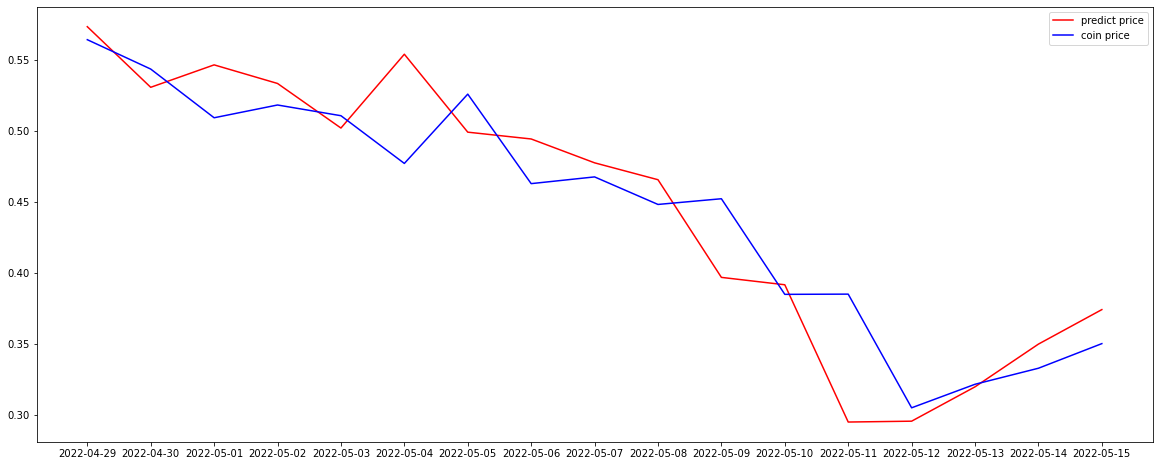

In [13]:
gfmodel.visualize()

In [14]:
result.to_csv('IOTA_result_data')
gfmodel.save_csv('IOTA_Visulize_data.csv')